In [1]:
#pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load image 
img=cv2.imread(r"D:\Beinex\Python\Tasks\26.OpenCV\flight.jpg")

#dispaly the imgae
cv2.imshow('Loaded Image', img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [4]:
#reading image in grayscale 
img_g=cv2.imread(r"D:\Beinex\Python\Tasks\26.OpenCV\flight.jpg",cv2.IMREAD_GRAYSCALE)

#dispaly the imgae
cv2.imshow('Greyscale Image',img_g)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [5]:
#checking the shape of image
print(img.shape)

(446, 670, 3)


In [6]:
#checking the datatype of image
print(img.dtype)

uint8


Resizing and Scaling

In [7]:
#resize the image
new_width=500
new_height=500
image_new=cv2.resize(img, (new_width, new_height))

#display and save transformed image
cv2.imshow('Resized Image',image_new)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.imwrite('resized_image.jpg',image_new)

True

In [8]:
#Scale the flight image by a factor
scale_factor=0.5
image_new=cv2.resize(img,None,fx=scale_factor, fy=scale_factor)
#display and save
cv2.imshow('Resized Image',image_new)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.imwrite('scaled_image.jpg',image_new)

True

Conversion of colour space

In [9]:
#converting image to different colourspaves and displaying it
img_grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#grey
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)#hsv
img_lab=cv2.cvtColor(img,cv2.COLOR_BGR2LAB) #lab, uniform colourpace
img_yuv=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)#yuv, compression of image

#dispaly the imgae
cv2.imshow('Greyscale Image',img_grey)
cv2.imshow('HSV Image',img_hsv)
cv2.imshow('LAB Image',img_lab)
cv2.imshow('YUV Image',img_yuv)
cv2.waitKey(10000)
cv2.destroyAllWindows()

Image rotation,flipping and translation

In [10]:
#rotate by 90 degree angle
img_rotc=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
img_rota=cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('Clockwise Rotated Image',img_rotc)
cv2.imshow('Anti-clockwise Rotated Image',img_rota)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [11]:
#flip the flight image
img_flip=cv2.flip(img,0)

cv2.imshow('flipped image',img_flip)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [12]:
#Store height and width of the image
h,w=img.shape[:2]
quarter_h, quarter_w=h/4, w/ 4

Trans=np.float32([[1, 0, quarter_w], [0, 1,quarter_h]])

#Using warpAffine to transform the image Trans
img_trans= cv2.warpAffine(img,Trans, (w, h))

cv2.imshow("Original image",img)
cv2.imshow('Image translation',img_trans)
cv2.waitKey(10000)

cv2.destroyAllWindows()
cv2.imwrite('Image_translation.jpg',img_trans)


True

Plotting image histogram

Text(0.5, 1.0, 'Blue Channel')

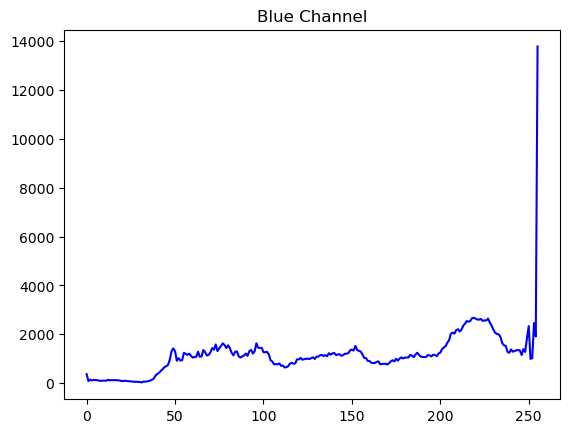

In [13]:
#computing the histogram of the Blue channel of the image and plotting
hist= cv2.calcHist([img],[0],None,[256],[0,256])
  
plt.plot(hist,color='b')
plt.title('Blue Channel')

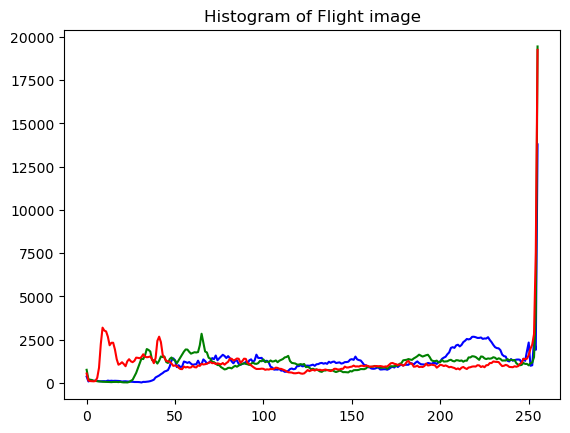

In [14]:
#plotting all Red, Green, Blue
  
#define colors 
colors=('b','g','r')
  
# compute and plot the image histograms
for i,color in enumerate(colors):
    hist=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('Histogram of Flight image')
plt.show()

*All the color channels are found to have a peak at 255*

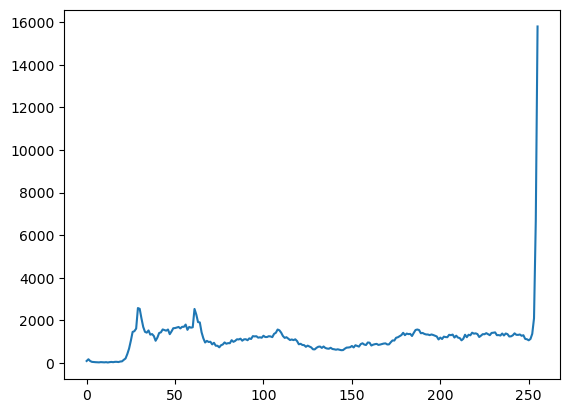

In [15]:
#plotting histogram for grey scale image
hist_g= cv2.calcHist([img_grey],[0],None,[256],[0,256])
plt.plot(hist_g)
plt.show()

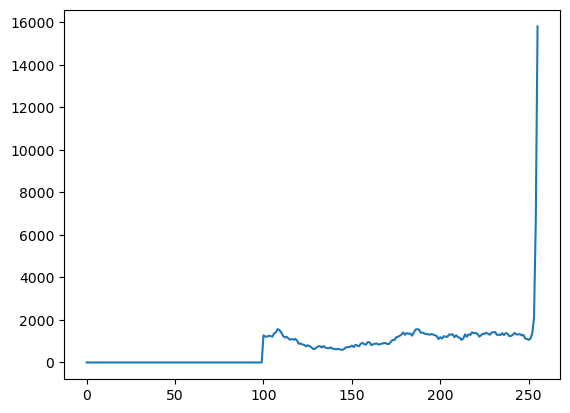

In [16]:
#Creating a binary mask 
mask = np.zeros_like(img_grey)
mask[(img_grey>=100) & (img_grey <=256)] = 255

#plotting histogram with this masking
hist_g= cv2.calcHist([img_grey],[0],mask,[256],[0,256])
plt.plot(hist_g)
plt.show()


Bitwise Operation<br>
*I applied the bitwise operation on original image and the HSV image of the original*

**AND**

In [17]:
#img1=cv2.imread(r'D:\Beinex\Python\Tasks\26.OpenCV\flight.jpg')  
#img2=cv2.imread(r'D:\Beinex\Python\Tasks\26.OpenCV\flower.jpg') 
img1=img
img2=img_hsv
  
#'cv2.bitwise_and' is applied over the image inputs
output1=cv2.bitwise_and(img2, img1, mask=None)
  
#output image
cv2.imshow('Bitwise And Output',output1)
cv2.waitKey(1000)
cv2.destroyAllWindows()

**OR**

In [18]:
#'cv2.bitwise_or' is applied over the image inputs
output2=cv2.bitwise_or(img2, img1, mask=None)
  
#output image
cv2.imshow('Bitwise Or Output',output2)
cv2.waitKey(1000)
cv2.destroyAllWindows()

**XOR**

In [19]:
# operates on each pixel's binary representation of the input images 
#and produces a new output image with the XOR results.
output3=cv2.bitwise_xor(img2, img1, mask=None)
  
#output image
cv2.imshow('Bitwise Xor Output',output3)
cv2.waitKey(1000)
cv2.destroyAllWindows()


'''# De-allocate any associated memory usage  
if cv2.waitKey(1000) & 0xff == 27: 
    cv2.destroyAllWindows()'''

'# De-allocate any associated memory usage  \nif cv2.waitKey(1000) & 0xff == 27: \n    cv2.destroyAllWindows()'

**NOT**

In [20]:
#cv2.bitwise_not is applied over the
#image input with applied parameters 
not1 = cv2.bitwise_not(img1, mask = None) ##img1
not2 = cv2.bitwise_not(img2, mask = None)
  
# the windows showing output image
# with the Bitwise NOT operation
# on the 1st and 2nd input image
cv2.imshow('Bitwise NOT on image 1',not1)
cv2.imshow('Bitwise NOT on image 2',not2)
cv2.waitKey(1000)
cv2.destroyAllWindows()


Interpolations

*Interpolation helps to maintain the visual quality and accuracy of the image during resizing or geometric transformations. Without interpolation, resizing an image to a non-integer scale or applying geometric transformations could lead to jagged or distorted edges.*

In [21]:
#Resize the image 
new_width=400
new_height=400 

#inearest neighbour interpolation
img_nn=cv2.resize(img, (new_width, new_height),cv2.INTER_NEAREST)
#inter linear interpolation
img_il=cv2.resize(img, (new_width, new_height),cv2.INTER_LINEAR)
#inter-cubic interpolation
img_ic=cv2.resize(img, (new_width, new_height),cv2.INTER_CUBIC)
#Lanczos Interpolation
img_lz=cv2.resize(img, (new_width, new_height),cv2.INTER_LANCZOS4)
#inter area interpolation
img_ia=cv2.resize(img, (new_width, new_height),cv2.INTER_AREA)


# Display resized images
cv2.imshow('Resizing - Nearest neighbour',img_nn)
cv2.imshow('Resizing - Inter linear',img_il)
cv2.imshow('Resizing - Inter cubic',img_ic)
cv2.imshow('Resizing - Lanczos',img_lz)
cv2.imshow('Resizing - Inter area',img_ia)
cv2.waitKey(10000)
cv2.destroyAllWindows()

Image Filtering

In [22]:
#Gaussian blur method
img_gaus=cv2.GaussianBlur(img,(3,3),5,5)
#median filtering
img_med=cv2.medianBlur(img,3)
#box filtering
img_bx=cv2.boxFilter(img,-1,(3,3))
#laplasian filtering
img_lap=cv2.Laplacian(img, cv2.CV_64F,3)
#Canny edge detection filtering
img_can=cv2.Canny(img, 100, 200)


cv2.imshow('Gaussian Filter',img_gaus)
cv2.imshow('Median Filter',img_med)
cv2.imshow('Box Filter',img_bx)
cv2.imshow('Laplacian',img_lap)
cv2.imshow('Canny Filter',img_can)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [23]:
#Sobel filter -X and Y directions
sobel_x= cv2.Sobel(img, cv2.CV_64F, 1, 0, 3)
sobel_y=cv2.Sobel(img, cv2.CV_64F, 0, 1,3)

# Display the original, Sobel X, and Sobel Y images
cv2.imshow('Original Image', img)
cv2.imshow('Sobel X', sobel_x)
cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(1000)
cv2.destroyAllWindows()

Image thresholding

In [24]:
#here we use the img_grey image 
ret,thresh1 = cv2.threshold(img_grey,127, 255, cv2.THRESH_BINARY)
ret,thresh2= cv2.threshold(img_grey,127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_grey,127, 255, cv2.THRESH_TRUNC)
ret,thresh4 =cv2.threshold(img_grey,127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_grey,127, 255, cv2.THRESH_TOZERO_INV)

cv2.imshow('Binary Threshold', thresh1)
cv2.imshow('Binary Threshold Inverted', thresh2)
cv2.imshow('Truncated Threshold', thresh3)
cv2.imshow('Set to 0', thresh4)
cv2.imshow('Set to 0 Inverted', thresh5)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [25]:
#Adaptive thresholding method
mean_thresh= cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,225,3)
Gaus_thresh = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,255,3)

cv2.imshow('Adaptive Mean', mean_thresh)
cv2.imshow('Adaptive Gaussian', Gaus_thresh)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [26]:
#otsu thresholding
img_grey,otsu_thresh = cv2.threshold(img_grey,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('Otsu Threshold', otsu_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

Erosion and Dilation

In [28]:
img2=cv2.imread(r"D:\Beinex\Python\Tasks\26.OpenCV\erdil.jpg")
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [36]:
#erode the image
img2_ero=cv2.erode(img2,np.ones((3,3),np.uint8), iterations =2)
#applying dilation
img2_dil= cv2.dilate(img2,np.ones((3,3),np.uint8), iterations = 1)
cv2.imshow('Original image', img2)
cv2.imshow('Erosion', img2_ero)
cv2.imshow('dilated', img2_dil)
cv2.waitKey(2000)
cv2.destroyAllWindows()

cv2.imwrite('original.jpg',img2)
cv2.imwrite('erosion.jpg',img2_ero)
cv2.imwrite('dilation.jpg',img2_dil)

True

Image pyramids

*multi-scale representations of an image that allow us to work with images at different levels of resolution*

*Useful in image detection, object detection etc.*

In [48]:
imgf=cv2.imread(r"D:\Beinex\Python\Tasks\26.OpenCV\flower.jpg")
img3=cv2.cvtColor(imgf, cv2.COLOR_BGR2RGB)

In [51]:
img_sm=cv2.pyrDown(img3)
img_lg= cv2.pyrUp(img3)

cv2.imshow('Original image',imgf)
cv2.imshow('rgb image',img3)
cv2.imshow('Smaller image', img_sm)
cv2.imshow('Larger image', img_lg)
cv2.waitKey(2000)
cv2.destroyAllWindows()

cv2.imwrite('original.jpg',imgf)
cv2.imwrite('image_rgb.jpg',img3)
cv2.imwrite('smaller.jpg',img_sm)
cv2.imwrite('larger.jpg',img_lg)

True